# 최종 코드

In [12]:
import csv

f = open('1.txt', 'r')
reader = csv.reader(f)

next(reader)

lots = []

for row in reader:
    Jobid = int(row[0])
    Jobtype = row[1]
    quantity = int(row[2])
    due = int(row[3])

    lots.append([Jobid, Jobtype, quantity, due])

print(lots)

f.close()



machines = []

for m in range(18):
    machines.append(['X', 0]) # SETUP 상태, MAX타임

# Lots를 마감 기한이 빠른 순서로 정렬
lots = sorted(lots, key=lambda x: x[3])

# Job Type에 따른 머신 배정 매핑
job_type_to_machine = {
    'I': [0],  # 19시간
    'B': [1, 2, 3, 4],  # 80시간
    'E': [5, 6, 7],  # 58시간
    'M': [8],  # 23시간
    'D': [9, 10, 11],  # 71시간
    'G': [12],  # 8시간
    'A': [12, 13],  # 36시간
    'C': [14],  # 25시간
    'J': [15],  # 23시간
    'F': [16],  # 29시간
    'L': [17],  # 10시간
    'K': [17],  # 10시간
    'H': [17],  # 2시간
}

schedule = []
total_tardi = 0

for lot in lots:
    JobId = lot[0]
    JobType = lot[1]
    Qty = lot[2]
    Due = lot[3]

    # Job Type에 따라 할당할 머신 선택
    available_machines = job_type_to_machine.get(JobType, [])

    # 주어진 작업을 처리할 수 있는 머신들 중에서 현재 시간이 가장 적은 머신을 선택하는 것
    MachineId = min(available_machines, key=lambda x: machines[x][1])

    # Setup 시간 고려
    if machines[MachineId][0] != JobType:
        schedule.append([-1, MachineId, 'S', machines[MachineId][1], machines[MachineId][1] + 2, -1, -1])
        machines[MachineId][1] += 2

    # 작업 시작 및 완료 시간 계산
    sTime = machines[MachineId][1]
    cTime = sTime + Qty

    # 지연 시간을 계산하고 총 지연 시간에 반영
    tar = max(0, cTime - Due)
    tar = min(tar, Qty)
    total_tardi += tar

    # 머신 상태 업데이트
    machines[MachineId][0] = JobType
    machines[MachineId][1] = cTime

    schedule.append([JobId, MachineId, JobType, sTime, cTime, Due, tar])



# 기존 스케줄에서 머신 16의 작업을 확인
machine_16_jobs = [job for job in schedule if job[1] == 16]
last_3_jobs = machine_16_jobs[-2:]

# 머신 7의 마지막 완료 시간 확인
machine_7_last_time = machines[7][1]

# 머신 7로 작업 이동 및 시간 재계산
for job in last_3_jobs:
    JobId, _, JobType, _, _, Due, _ = job
    Qty = job[4] - job[3]  # 작업의 양

    # Setup 시간이 필요한지 확인
    if machines[7][0] != JobType:
        schedule.append([-1, 7, 'S', machine_7_last_time, machine_7_last_time + 2, -1, -1])
        machine_7_last_time += 2

    sTime = machine_7_last_time
    cTime = sTime + Qty

    tar = max(0, cTime - Due)
    tar = min(tar, Qty)

    # 머신 7의 상태 업데이트
    machines[7][0] = JobType
    machines[7][1] = cTime

    # 스케줄에 반영
    schedule.remove(job)
    schedule.append([JobId, 7, JobType, sTime, cTime, Due, tar])
    # 머신 7의 마지막 완료 시간 업데이트
    machine_7_last_time = cTime

# 전체 지연 시간 재계산
total_tardi = sum(job[6] for job in schedule)



# 스케줄 확인
machine_9_jobs = [job for job in schedule if job[1] == 9]

# 머신 9의 마지막 작업 찾기
last_job = machine_9_jobs[-1]

# 머신 4의 마지막 완료 시간 확인
machine_4_last_time = machines[4][1]

# 마지막 작업을 머신 4로 이동 및 시간 재계산
JobId, _, JobType, _, _, Due, _ = last_job
Qty = last_job[4] - last_job[3]  # 작업의 양

# Setup 시간이 필요한지 확인
if machines[4][0] != JobType:
    schedule.append([-1, 4, 'S', machine_4_last_time, machine_4_last_time + 2, -1, -1])
    machine_4_last_time += 2

sTime = machine_4_last_time
cTime = sTime + Qty

tar = max(0, cTime - Due)
tar = min(tar, Qty)

# 머신 4의 상태 업데이트
machines[4][0] = JobType
machines[4][1] = cTime

# 스케줄에 반영
schedule.remove(last_job)
schedule.append([JobId, 4, JobType, sTime, cTime, Due, tar])

# 전체 지연 시간 재계산
total_tardi = sum(job[6] for job in schedule)

print("Total Tardiness:", total_tardi)

[[0, 'F', 6, 21], [1, 'E', 2, 12], [2, 'B', 6, 10], [3, 'B', 5, 13], [4, 'A', 3, 8], [5, 'E', 2, 3], [6, 'J', 3, 16], [7, 'D', 5, 16], [8, 'E', 5, 10], [9, 'C', 4, 13], [10, 'F', 3, 20], [11, 'M', 6, 18], [12, 'J', 4, 7], [13, 'M', 3, 3], [14, 'A', 4, 25], [15, 'B', 6, 7], [16, 'D', 6, 7], [17, 'D', 5, 5], [18, 'J', 6, 25], [19, 'E', 3, 19], [20, 'A', 3, 12], [21, 'F', 6, 10], [22, 'E', 6, 11], [23, 'B', 3, 4], [24, 'E', 3, 3], [25, 'A', 4, 12], [26, 'I', 2, 12], [27, 'D', 6, 19], [28, 'D', 3, 23], [29, 'E', 2, 10], [30, 'B', 5, 9], [31, 'E', 5, 17], [32, 'E', 3, 14], [33, 'D', 2, 4], [34, 'E', 2, 16], [35, 'I', 2, 2], [36, 'E', 5, 17], [37, 'L', 4, 20], [38, 'M', 5, 24], [39, 'E', 5, 25], [40, 'E', 2, 8], [41, 'B', 2, 11], [42, 'J', 6, 23], [43, 'G', 2, 4], [44, 'D', 3, 25], [45, 'E', 4, 5], [46, 'E', 6, 20], [47, 'J', 4, 15], [48, 'F', 2, 22], [49, 'D', 2, 17], [50, 'D', 5, 15], [51, 'B', 3, 12], [52, 'G', 6, 19], [53, 'A', 3, 4], [54, 'B', 2, 2], [55, 'B', 5, 11], [56, 'F', 3, 11], 

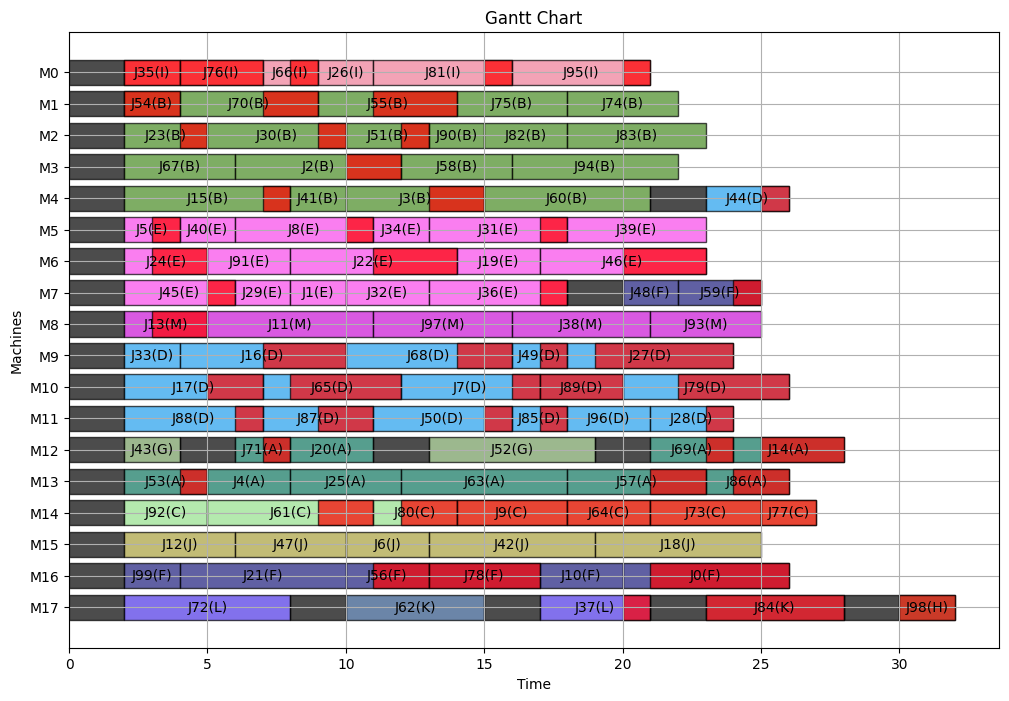

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [13]:
f = open('schedule_out.csv', 'w')
writer = csv.writer(f)

writer.writerow(['JobId', 'MachineId', 'JobType', 'sTime', 'cTime', 'Due', 'Tar'])

for row in schedule:
    writer.writerow(row)

f.close()

# gantt drawling
from Gantt_Ex import Gantt

Gantt('schedule_out.csv').plot_gantt_chart()